In [1]:
import pandas as pd

from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as colors
import numpy as np

import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
unemployment = pd.read_csv('data/unemployment_2018.csv')

unemployment = unemployment.query('period == "M12"')

In [3]:
FIPS = pd.read_csv('data/FIPS.csv')

In [4]:
unemployment = pd.merge(left = unemployment, right = FIPS)

unemployment = unemployment.rename(columns={'Name': 'COUNTY'})

unemployment.COUNTY = unemployment.COUNTY.replace('De Kalb', 'Dekalb').replace('Van Buren', 'Van_Buren')

In [5]:
# shapefile obtained from http://www.tngis.org/administrative-boundaries.htm
counties = gpd.read_file('data/county/tn_counties.shp')

In [6]:
unemployment = pd.merge(left = counties, right = unemployment)

Using the full *Greys* colormap. This makes counties with 3% unemployment white. I think I prefer starting the colormap as slightly darker shades, which is what the truncate_colormap function defined below does.

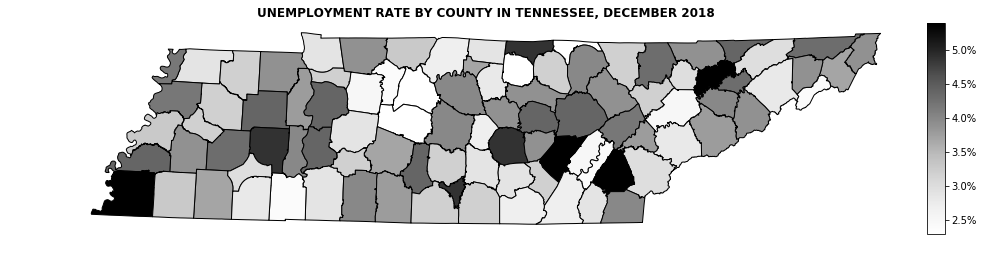

In [7]:
fig, ax = plt.subplots(figsize = (16,4))
unemployment.plot(column = 'value', ax = ax, legend = False, cmap = 'Greys', edgecolor = 'black')
plt.axis('off')
plt.title('UNEMPLOYMENT RATE BY COUNTY IN TENNESSEE, DECEMBER 2018', fontweight = 'bold')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)

cmap = cm.ScalarMappable(
      norm = Normalize(unemployment.value.min(), unemployment.value.max()), 
      cmap = 'Greys')
cmap.set_array([])    
fig.colorbar(mappable=cmap, cax = cax, format = FuncFormatter(lambda y, _: '{:.1%}'.format(y/100)));

In [8]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


cmap = plt.get_cmap('Greys')
new_cmap = truncate_colormap(cmap, 0.2, 1)

Using the truncated colormap.

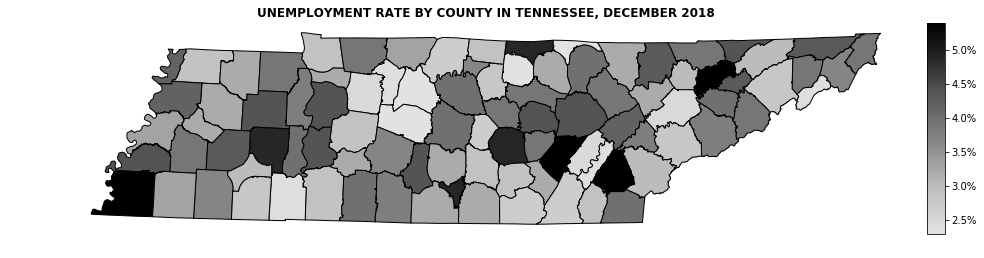

In [9]:
fig, ax = plt.subplots(figsize = (16,4))
unemployment.plot(column = 'value', ax = ax, legend = False, cmap = new_cmap, edgecolor = 'black')
plt.axis('off')
plt.title('UNEMPLOYMENT RATE BY COUNTY IN TENNESSEE, DECEMBER 2018', fontweight = 'bold')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)

cmap = cm.ScalarMappable(
      norm = Normalize(unemployment.value.min(), unemployment.value.max()), 
      cmap = new_cmap)
cmap.set_array([])    
fig.colorbar(mappable=cmap, cax = cax, format = FuncFormatter(lambda y, _: '{:.1%}'.format(y/100)))
plt.savefig('Unemployment_By_County.png');